In [1]:
import os
from pathlib import Path


from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import clean_df
from UCB_training.UCB_utils import combinedPlot

MAKE SURE YOU HAVE THE CORRECT DIRECTORY SET UP BY RUNNING THE FOLLOWING CELL:

In [2]:
# Dynamically find the library paht from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella"))
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all
Train Basin File Exists: True


In [3]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage.yaml")

TESTING ENSEMBLE ON DAILY:

In [4]:
params = {
    "epochs":3,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmDaily = UCB_trainer(path_to_csv, num_ensemble_members=2, yaml_path= path_to_yaml, hyperparams= params)

In [5]:
lstmDaily.train()

2025-02-03 20:51:40,983: Logging to /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/output.log initialized.
2025-02-03 20:51:40,984: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140
2025-02-03 20:51:40,985: ### Run configurations for testing_run
2025-02-03 20:51:40,985: experiment_name: testing_run
2025-02-03 20:51:40,986: train_basin_file: calpella
2025-02-03 20:51:40,986: validation_basin_file: calpella
2025-02-03 20:51:40,987: test_basin_file: calpella
2025-02-03 20:51:40,987: train_start_date: 1994-10-01 00:00:00
2025-02-03 20:51:40,988: train_end_date: 2002-09-30 00:00:00
2025-02-03 20:51:40,988: validation_start_date: 2002-10-01 00:00:00
2025-02-03 20:51:40,989: validation_end_date: 2005-09-30 00:00:00
2025-02-03 20:51:40,989: test_start_date: 2005-10-01 00:00:00
2025-02-03 20:51:40,989: test_end_date: 2009-09-30 00:00:00
2025-02-03 20:51:40,990: devi

/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(weight_file

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]
2025-02-03 20:52:23,645: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/validation/model_epoch003/validation_metrics.csv
2025-02-03 20:52:23,646: Stored results at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/validation/model_epoch003/validation_results.p
2025-02-03 20:52:23,677: Using the model weights from /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/testing_run_0302_205202/model_epoch003.pt


/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(weight_file

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
2025-02-03 20:52:25,186: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/testing_run_0302_205202/validation/model_epoch003/validation_metrics.csv
2025-02-03 20:52:25,186: Stored results at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/testing_run_0302_205202/validation/model_epoch003/validation_results.p


[PosixPath('/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140'),
 PosixPath('/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/testing_run_0302_205202')]

Loading results for each run.


100%|██████████| 2/2 [00:00<00:00, 984.23it/s]


Combining results and calculating metrics.


100%|██████████| 1/1 [00:00<00:00, 109.52it/s]

got predictions
2025-02-03 20:52:25,238: Predictions: <xarray.DataArray 'NR CALPELLA FLOW COE CPL_sim' (datetime: 1096)>
array([ 96.27345 , 103.318405, 104.296234, ..., 114.97856 , 107.74719 ,
       102.52121 ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-10-01 2002-10-02 ... 2005-09-30


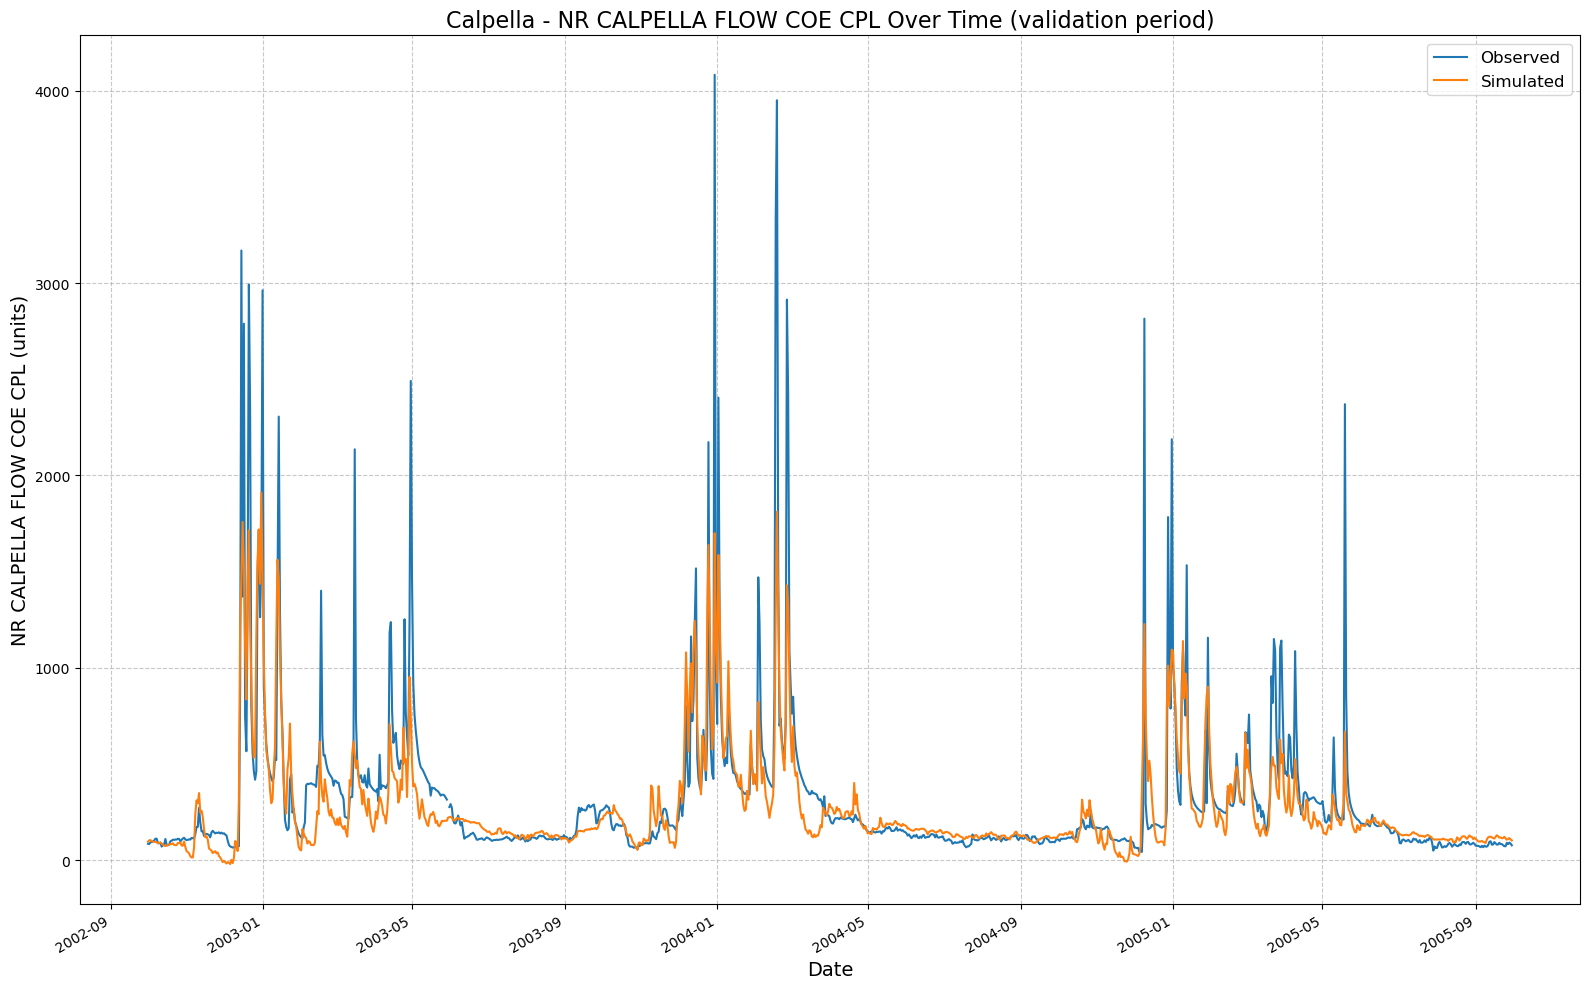

/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205140/testing_run_0302_205202/results_output_validation.csv


{'NSE': 0.6640416085720062,
 'MSE': 57553.125,
 'RMSE': 239.90232387369656,
 'KGE': 0.605224081240336,
 'Alpha-NSE': 0.670278695295886,
 'Beta-KGE': 0.85340416431427,
 'Beta-NSE': -0.11215623547010393,
 'Pearson-r': 0.8398702144622803,
 'FHV': -40.411773324012756,
 'FMS': -18.859782036375673,
 'FLV': -2163.939036877296,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 62.12495803833008}

In [6]:
lstmDaily.results()

In [7]:
params = {
    "epochs":3,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmDaily2 = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [8]:
lstmDaily2.train()

2025-02-03 20:52:25,470: Logging to /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225/output.log initialized.
2025-02-03 20:52:25,470: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225
2025-02-03 20:52:25,471: ### Run configurations for testing_run
2025-02-03 20:52:25,472: experiment_name: testing_run
2025-02-03 20:52:25,472: train_basin_file: calpella
2025-02-03 20:52:25,472: validation_basin_file: calpella
2025-02-03 20:52:25,473: test_basin_file: calpella
2025-02-03 20:52:25,473: train_start_date: 1994-10-01 00:00:00
2025-02-03 20:52:25,473: train_end_date: 2002-09-30 00:00:00
2025-02-03 20:52:25,474: validation_start_date: 2002-10-01 00:00:00
2025-02-03 20:52:25,474: validation_end_date: 2005-09-30 00:00:00
2025-02-03 20:52:25,474: test_start_date: 2005-10-01 00:00:00
2025-02-03 20:52:25,474: test_end_date: 2009-09-30 00:00:00
2025-02-03 20:52:25,475: devi

/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(weight_file

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]
2025-02-03 20:52:47,026: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225/validation/model_epoch003/validation_metrics.csv
2025-02-03 20:52:47,031: Stored results at /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225/validation/model_epoch003/validation_results.p


PosixPath('/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225')

got predictions


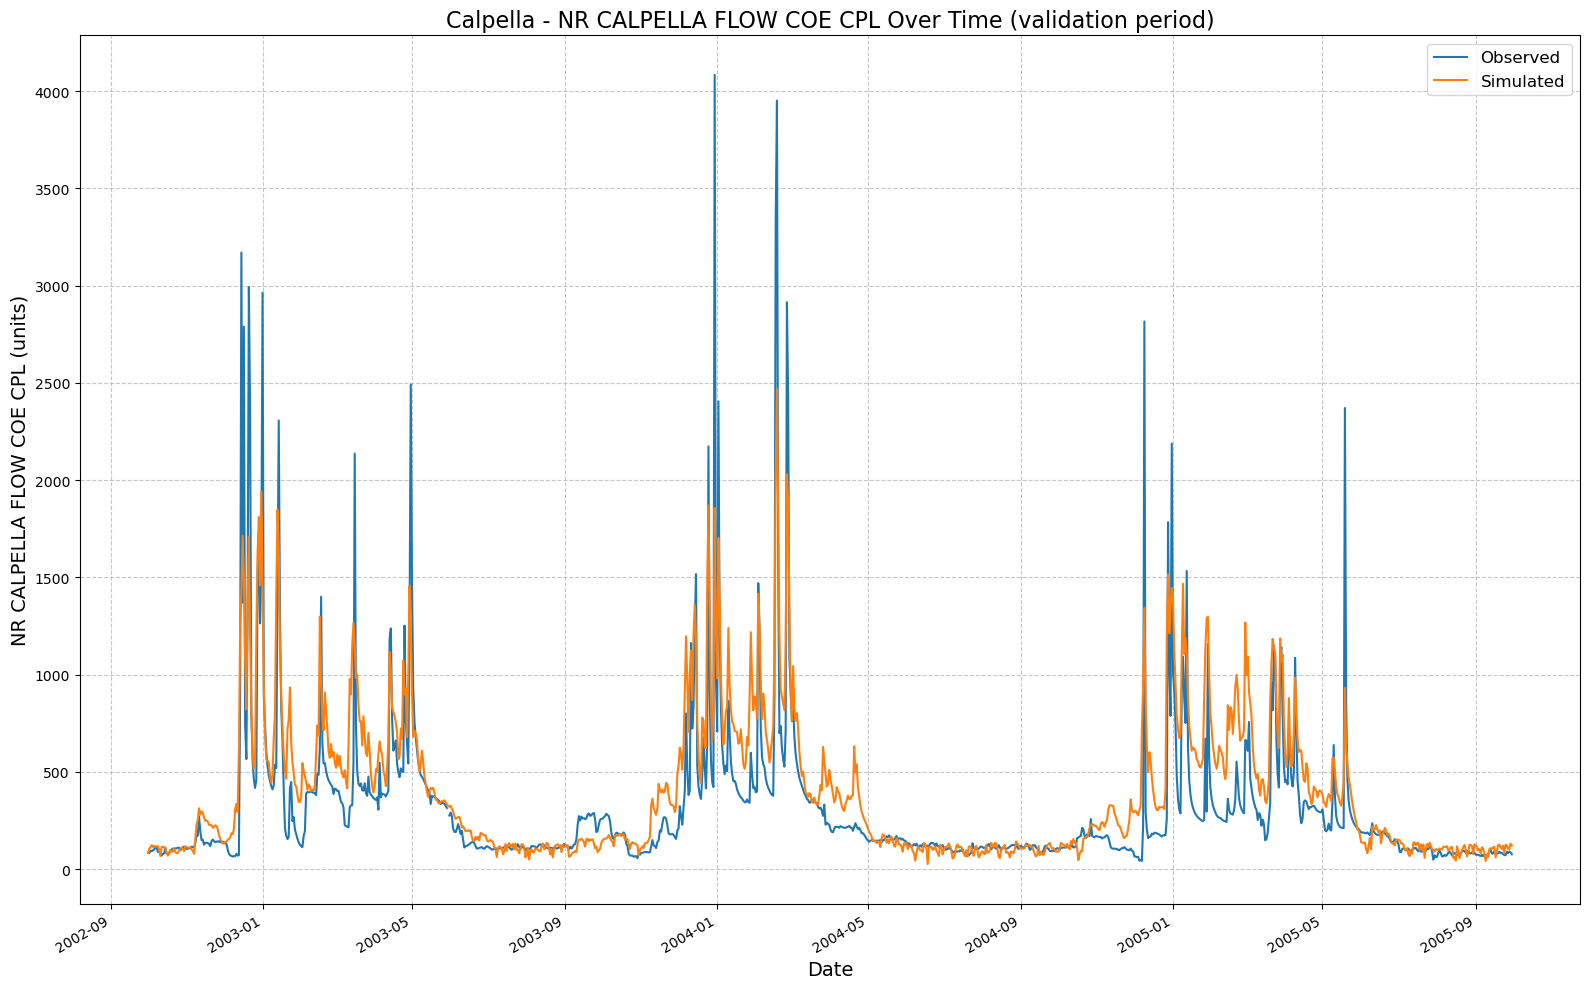

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0302_205225/results_output_validation.csv


/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.6369528770446777,
 'MSE': 62193.703125,
 'RMSE': 249.38665386303254,
 'KGE': 0.6718733772642735,
 'Alpha-NSE': 0.8921362451349503,
 'Beta-KGE': 1.2553668022155762,
 'Beta-NSE': 0.19537382118441704,
 'Pearson-r': 0.8244429230690002,
 'FHV': -32.180967926979065,
 'FMS': 28.787474729413233,
 'FLV': -66.30741980263129,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 54.49259757995606}

In [9]:
lstmDaily2.results()